[2.0011598032510833, 1.9983976673870734]
[1.993161508801515, 1.9820266485997249]
[0.609518262711535, 0.3664503066786509]
[1.010405963964939, 1.019326493789137]
[5.237273753059355, 5.240035888923375]
[5.291132630495346, 5.225235189911592]
[-0.0015184253984289933, 0.9942315535771589]
[0.0, 0.0]


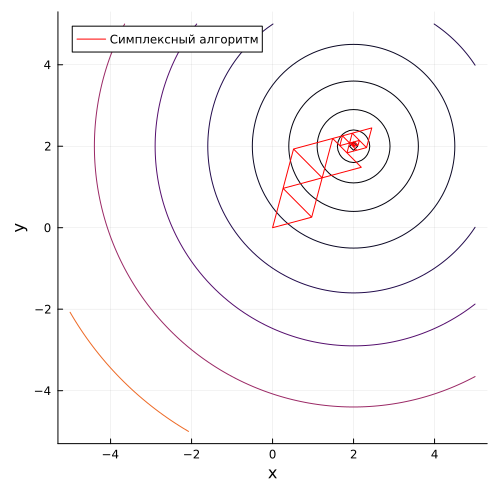

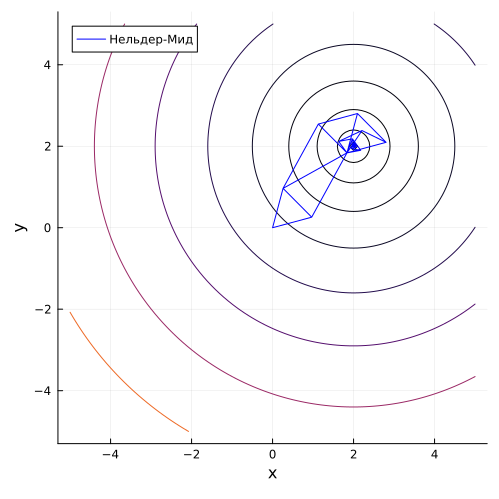

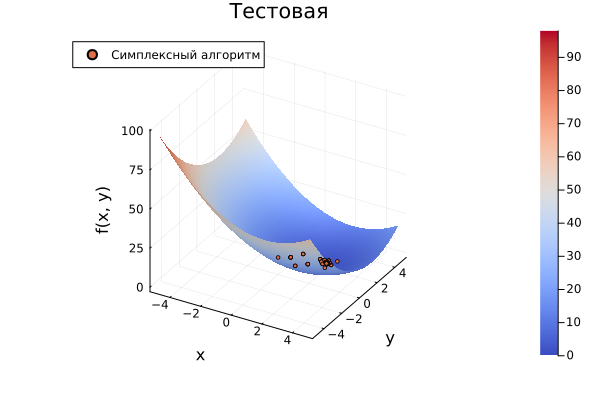

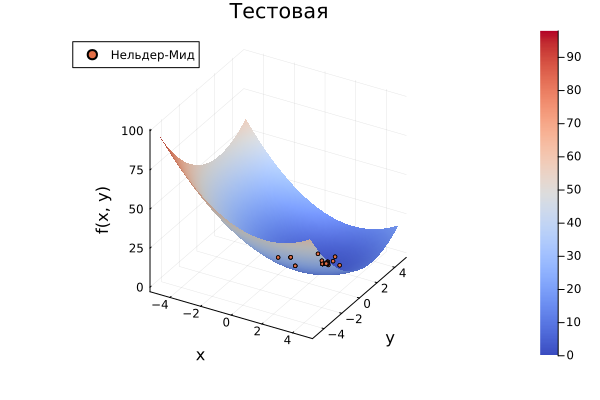

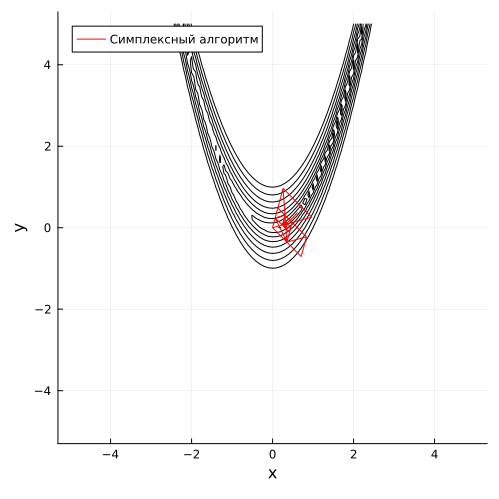

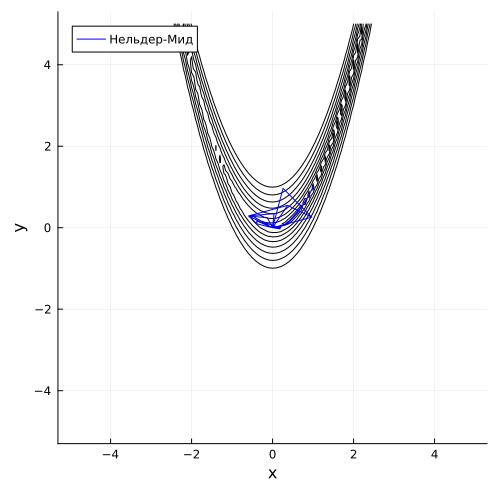

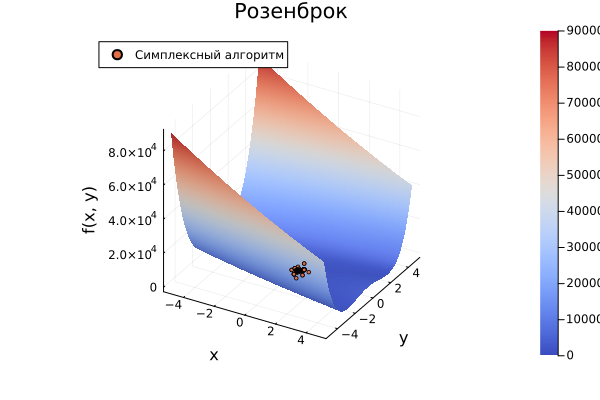

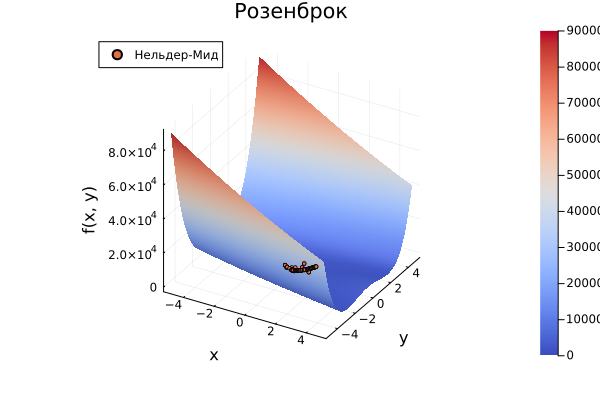

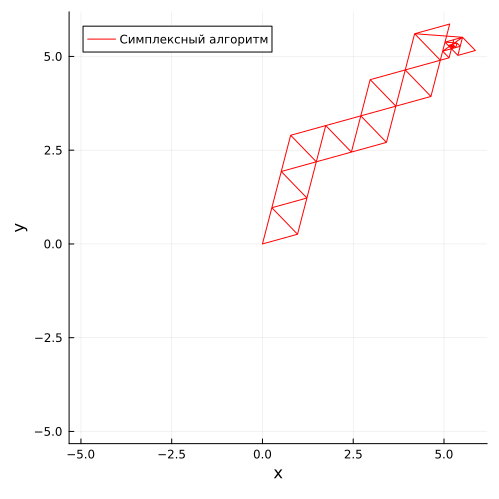

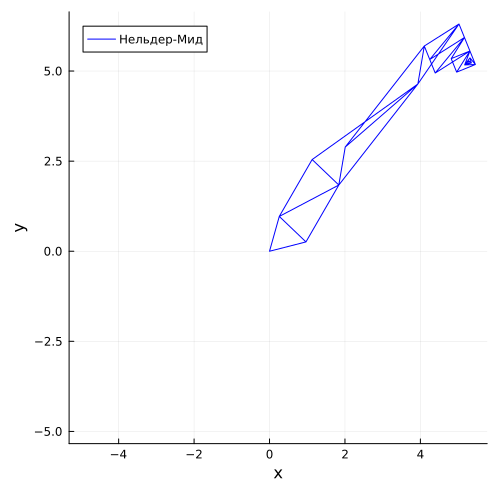

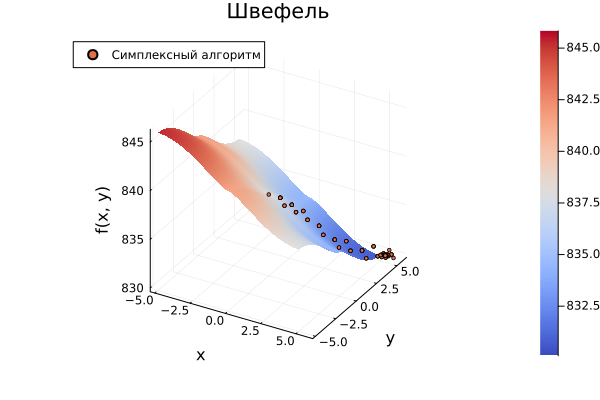

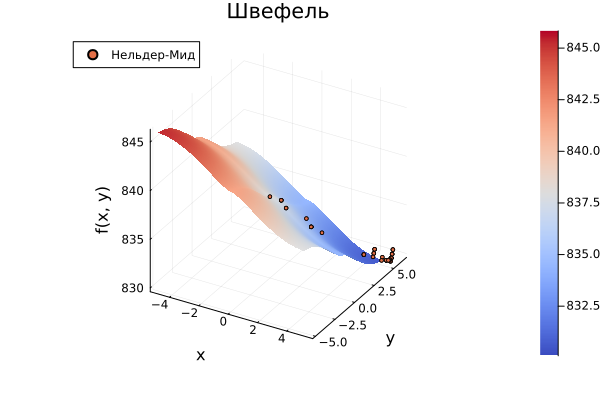

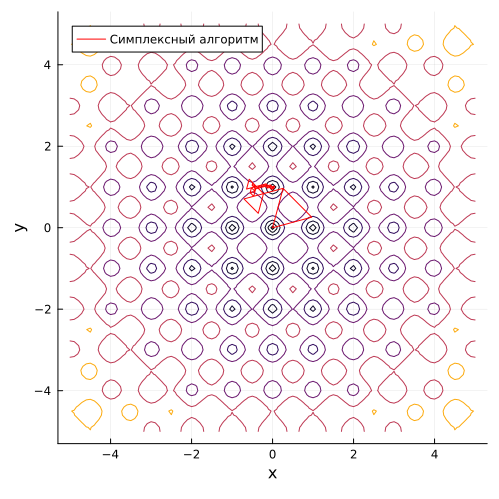

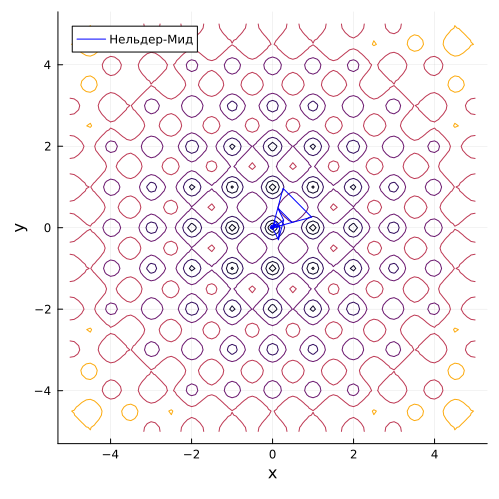

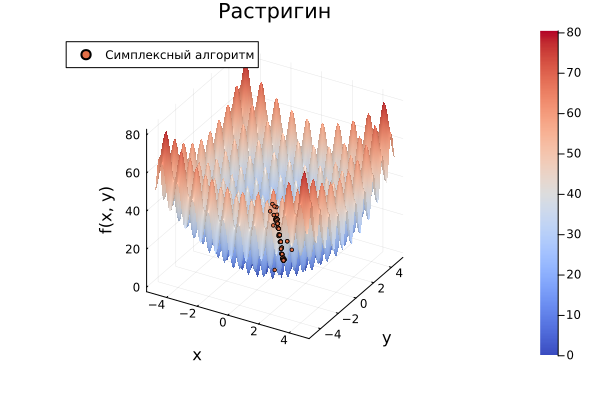

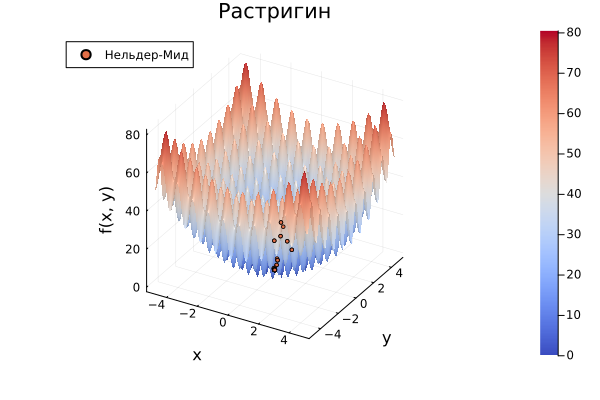

In [1]:
using Plots
using LinearAlgebra

gr()

function simplex_method(f, xs)
    x1 = [0.0,0.0]
    x2 = [(sqrt(3)+1)/(2*sqrt(2)), (sqrt(3)-1)/(2*sqrt(2))]
    x3 = [(sqrt(3)-1)/(2*sqrt(2)), (sqrt(3)+1)/(2*sqrt(2))]
    points = [x1,x2,x3]
    points[1] = x1
    points[2] = x2
    points[3] = x3
    push!(xs, x3)
    push!(xs, x1)
    push!(xs, x2)
    push!(xs, x3)
    while true
        if(norm(points[1]- points[2])) < 0.001
            return points[1]
        end
        if(f(points[2]) >= f(points[1]) && f(points[2]) >= f(points[3]))
            temp = points[1]
            points[1] = points[2]
            points[2] = temp
        elseif (f(points[3]) >= f(points[1]) && f(points[3]) >= f(points[2]))
            temp = points[1]
            points[1] = points[3]
            points[3] = temp
        end
        x4 = points[2] + points[3] - points[1]
        if(f(x4) >= f(points[2]) && f(x4) >= f(points[3]))
            points[1] = x4
            points[2] = x4 + (points[2] - x4) / 2
            points[3] = x4 + (points[3] - x4) / 2
        else
            points[1] = x4
        end
        push!(xs, points[3])
        push!(xs, x4)
        push!(xs, points[2])
        push!(xs, points[3])
    end
end

function nelder_meed(f, xs)
    x1 = [0.0,0.0]
    x2 = [(sqrt(3)+1)/(2*sqrt(2)), (sqrt(3)-1)/(2*sqrt(2))]
    x3 = [(sqrt(3)-1)/(2*sqrt(2)), (sqrt(3)+1)/(2*sqrt(2))]
    points = [x1,x2,x3]
    points[1] = x1
    points[2] = x2
    points[3] = x3
    xs = []
    center = [0.0,0.0]
    beta = 2.0
    push!(xs, x1)
    push!(xs, x2)
    push!(xs, x3)
    while true
        points = sort(points, by=x -> f(x), rev=true)
        push!(xs, points[3])
        push!(xs, points[1])
        push!(xs, points[2])
        push!(xs, points[3])
        center = (points[2]+points[3]) / 2.0
        if (sqrt(((f(points[1]) - f(center))^2 +((f(points[2]) - f(center))^2) + ((f(points[2]) - f(center))^2))/(3.0)) < 0.001)
            return  points[3],xs
        end
        x4 = points[2]+points[3]-points[1]
        beta = 2.0
        y_min =  f(points[3])
        if(f(x4) < y_min)
            beta = 2.0
            x5 = beta*x4 + (1-beta)*center
            if(f(x5)< f(x4) && f(x5)< f(points[3]) && f(x5)< f(points[2]))
                points[1] = x5
            else
                if(f(x5) > f(x4))
                    points[1] = x4
                end
            end
        else
            if f(points[3]) < f(x4) < f(points[2])
                points[1] = x4
            else
                if f(points[2]) < f(x4) < f(points[1])
                    points[1] = x4
                end
                points = sort(points, by=x -> f(x), rev=true)
                beta = 0.5
                x5 = beta * points[1] + (1 - beta) * center
                if f(x5) < f(points[1])
                    points[1] = x5
                else
                    points[1] = points[3] + 0.5 * (points[1] - points[3])
                    points[2] = points[3] + 0.5 * (points[2] - points[3])
                end
            end
        end
    end
end

function testF(x)
    return (x[1] - 2)^2 + (x[2] - 2)^2
end

function rosenbrock(x)
    return (1 - x[1])^2 + 100 * (x[2] - x[1]^2)^2
end

function schwefel(x)
    return 418.9829 * 2 - (x[1] * sin(sqrt(abs(x[1]))) + x[2] * sin(sqrt(abs(x[2]))))
end

function rastrigin(x)
    return 20 + sum(x.^2 .- 10 * cos.(2 * π * x))
end

x = -5.0:0.1:5.0
y = -5.0:0.1:5.0
levels = [i^4*0.01 for i in 1:10]

function plot_function_contours(f, func_name)
    xs = []
    res_simplex = simplex_method(f, xs)

    println(res_simplex)
    
    x_coords_simplex = [x[1] for x in xs]
    y_coords_simplex = [y[2] for y in xs]

    p1 = Plots.contour(x, y, (x, y) -> f([x, y]), levels = levels, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
    plot!(p1, x_coords_simplex, y_coords_simplex, label="Симплексный алгоритм", line=:red)

    res_nm, xs_nm = nelder_meed(f, xs)

    println(res_nm)

    x_coords_nm = [x[1] for x in xs_nm]
    y_coords_nm = [y[2] for y in xs_nm]
    
    p2 = Plots.contour(x, y, (x, y) -> f([x, y]), levels = levels, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
    plot!(p2, x_coords_nm, y_coords_nm, label="Нельдер-Мид", line=:blue)
    
    display(p1)
    display(p2)
    
    z = [f([xi, yi]) for xi in x, yi in y]

    p3d1 = Plots.surface(x, y, z, xlabel="x", ylabel="y", zlabel="f(x, y)", title=func_name, color=:coolwarm)
    p3d2 = Plots.surface(x, y, z, xlabel="x", ylabel="y", zlabel="f(x, y)", title=func_name, color=:coolwarm)

    plot!(p3d1, x_coords_simplex, y_coords_simplex, [f([x, y]) for (x, y) in zip(x_coords_simplex, y_coords_simplex)], 
          seriestype=:scatter3d, label="Симплексный алгоритм", linecolor=:red, markersize=2, marker=:circle)

    plot!(p3d2, x_coords_nm, y_coords_nm, [f([x, y]) for (x, y) in zip(x_coords_nm, y_coords_nm)], 
          seriestype=:scatter3d, label="Нельдер-Мид", linecolor=:blue, markersize=2, marker=:circle)
          
    display(p3d1)
    display(p3d2)
end

plot_function_contours(testF, "Тестовая")
plot_function_contours(rosenbrock, "Розенброк")
plot_function_contours(schwefel, "Швефель")
plot_function_contours(rastrigin, "Растригин")


